# Cuaderno para precios de Bi

In [46]:
import sys
import os
import pandas as pd
ruta = r"C:\Users\mariajose_chinchilla\Documents\GitHub\Reservas\utils"
sys.path.append(os.path.abspath(ruta))
from utils import resultado_percentiles, resultado_por_montos
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats as stats

In [64]:
# leer datos
df = pd.read_csv(r"C:\Users\mariajose_chinchilla\Desktop\Agosto\db\base_creditos_bi_v2.csv", sep=";")
df = df[(df["TASA"] > 0.12) & (df["PLAZO"] <= 144) & (df["RCI_INTERNO"] < 60)]

In [65]:
len(df)

3041

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 1 to 11244
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ENTIDAD          1938 non-null   object 
 1   DESEMBOLSO       1938 non-null   float64
 2   SALDO            1938 non-null   float64
 3   FECHA_CONCESION  1938 non-null   object 
 4   FECHA_VENCE      1938 non-null   object 
 5   PLAZO            1938 non-null   int64  
 6   TASA             1938 non-null   float64
 7   DPI              1938 non-null   int64  
 8   CODIGO_CLIENTE   1938 non-null   int64  
 9   INGRESOS         1938 non-null   float64
 10  RCI_INTERNO      1938 non-null   float64
 11  NIVEL RIESGO     1938 non-null   object 
 12  SALDO_BT         1938 non-null   float64
 13  TASA_MIN_BT      1938 non-null   float64
 14  TASA_MAX_BT      1938 non-null   float64
 15  PATRONO          1938 non-null   int64  
 16  nombre_patrono   1938 non-null   object 
 17  segmento         1

In [49]:
df.describe()

,DESEMBOLSO,SALDO,PLAZO,TASA,DPI,CODIGO_CLIENTE,INGRESOS,RCI_INTERNO,SALDO_BT,TASA_MIN_BT,TASA_MAX_BT,PATRONO
count,1.938000e+03,1.938000e+03,1938.000000,1938.000000,1.938000e+03,1.938000e+03,1.938000e+03,1938.000000,1938.000000,1938.000000,1938.000000,1.938000e+03
mean,5.350866e+05,4.232176e+05,49.536120,0.156143,2.356171e+12,2.333452e+08,5.356901e+04,37.734814,106940.055449,18.775227,18.996037,1.190013e+07
std,9.464765e+06,8.515641e+06,27.109483,0.025048,4.833953e+11,4.976871e+08,1.151158e+06,9.665010,149202.991287,3.762426,3.720733,4.540390e+07
min,8.670000e+02,1.305100e+02,1.000000,0.120845,1.572883e+12,1.164900e+04,7.500000e+02,0.000000,133.250000,8.000000,8.000000,1.001800e+04
25%,1.900000e+04,1.210001e+04,25.000000,0.135150,1.959001e+12,1.006029e+08,3.750000e+03,32.342500,20730.072500,16.000000,16.500000,6.541010e+05
50%,4.315000e+04,3.256404e+04,59.000000,0.155122,2.376738e+12,1.011015e+08,6.334500e+03,39.980000,51887.650000,18.000000,18.000000,9.999990e+05
75%,1.057500e+05,9.433200e+04,61.000000,0.163898,2.623796e+12,1.013539e+08,1.436000e+04,45.647500,123910.180000,22.000000,22.000000,9.999990e+05
max,3.500000e+08,3.500000e+08,121.000000,0.280100,4.050025e+12,2.500116e+09,5.050203e+07,49.990000,945377.750000,33.000000,33.000000,2.023049e+08


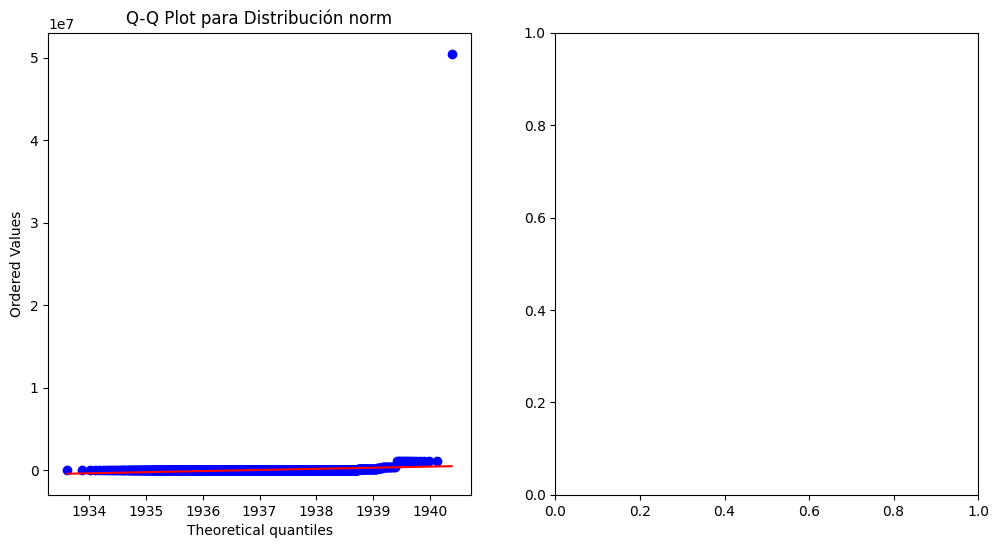

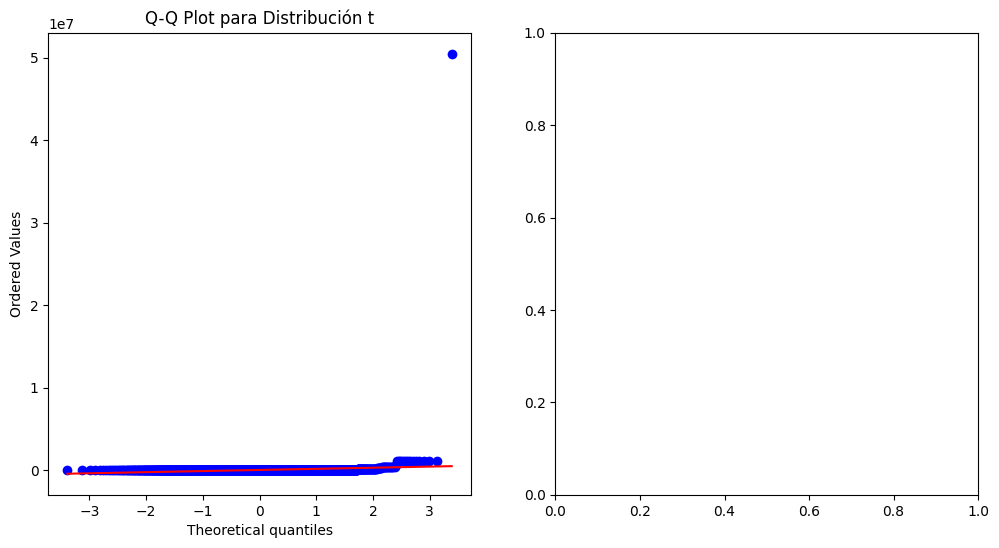

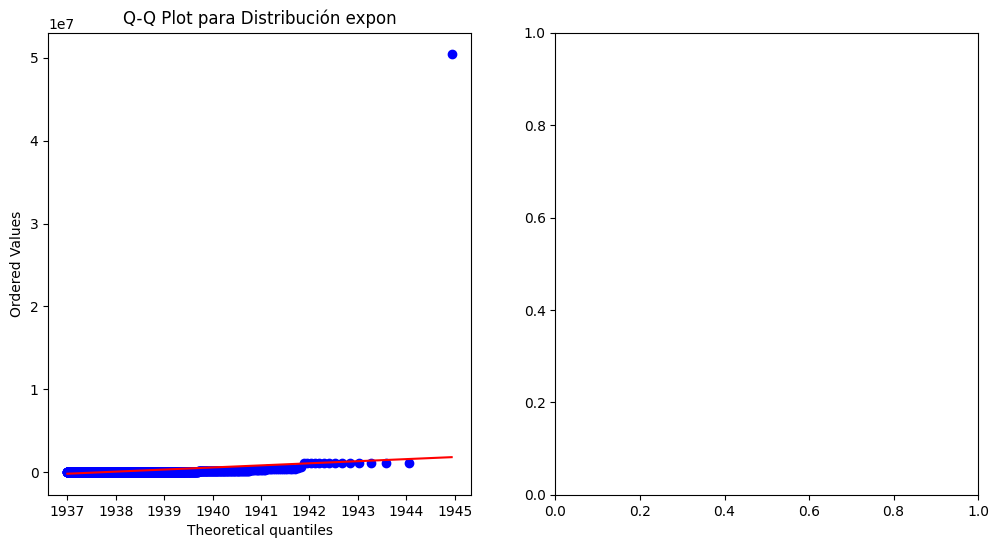

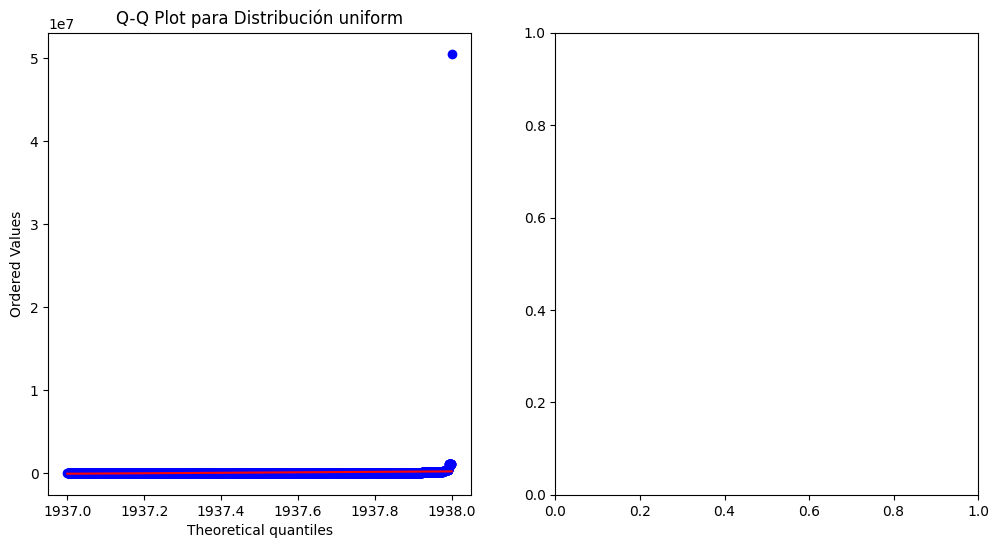

c:\Users\mariajose_chinchilla\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6063: RuntimeWarning: overflow encountered in exp
  return np.exp(s * _norm_ppf(q))
c:\Users\mariajose_chinchilla\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


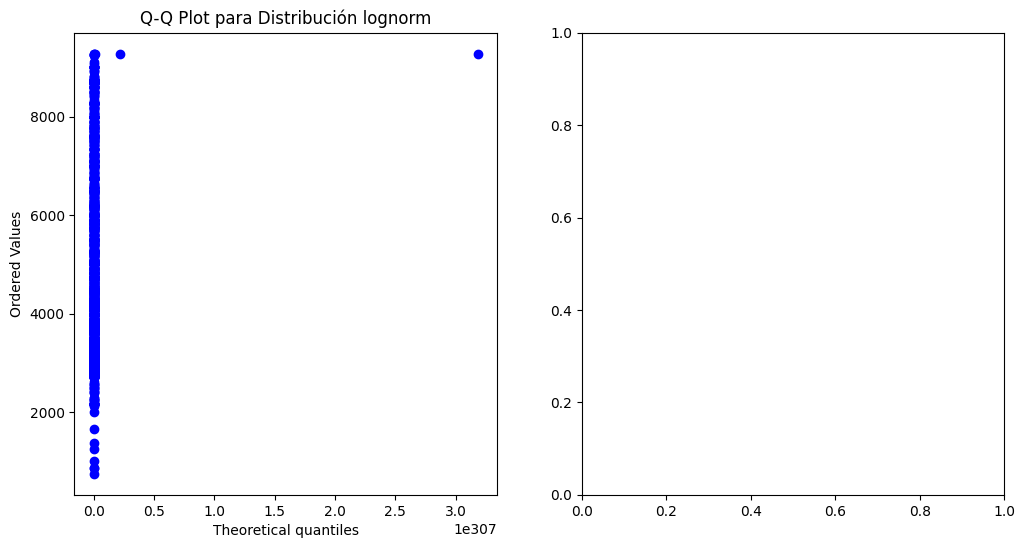

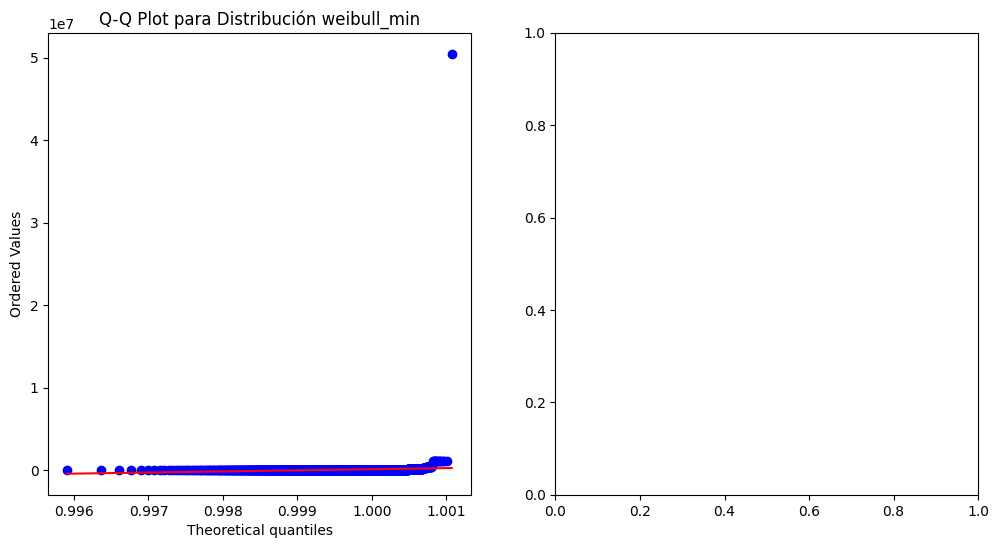

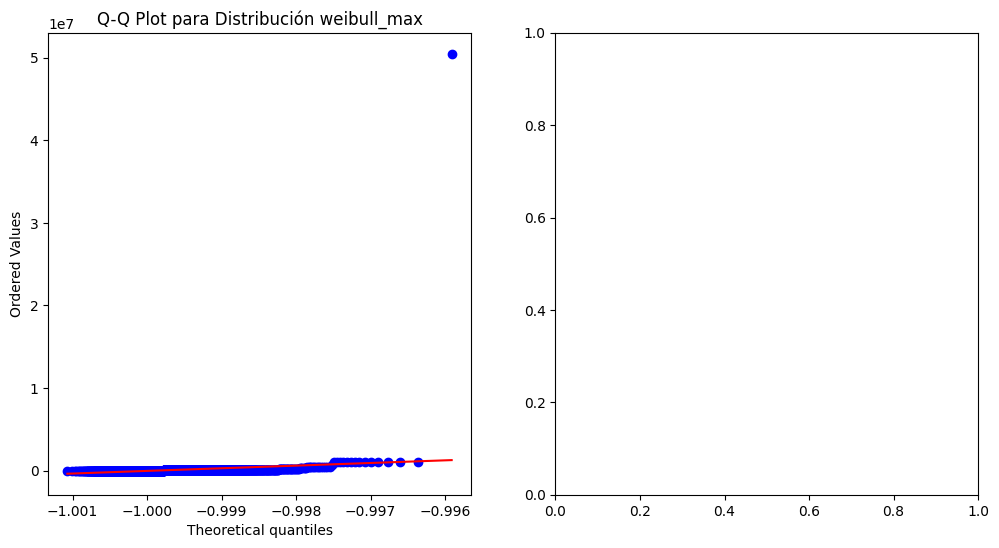

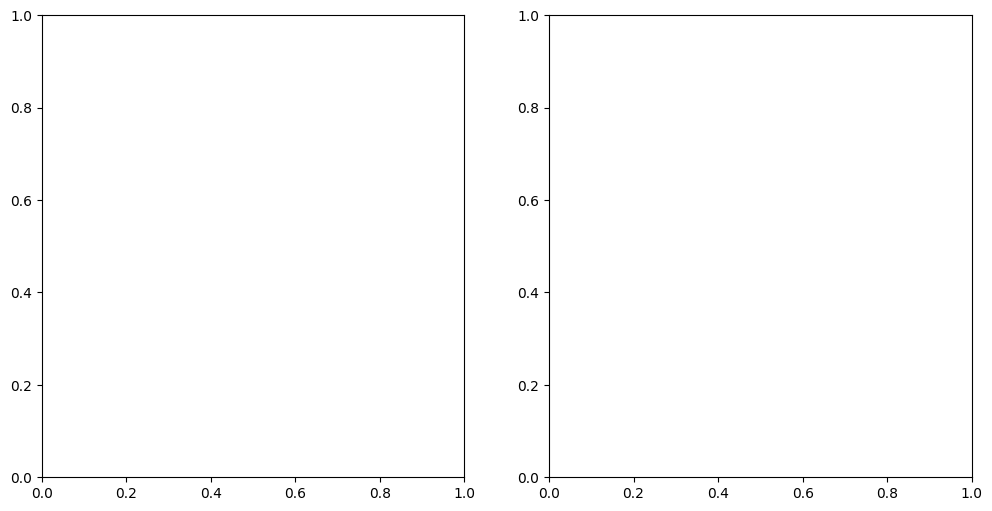

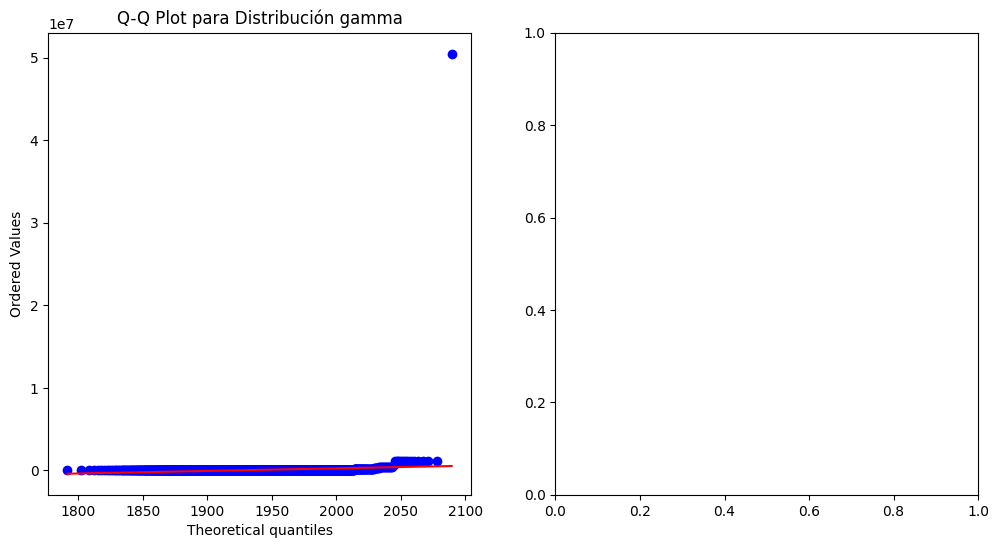

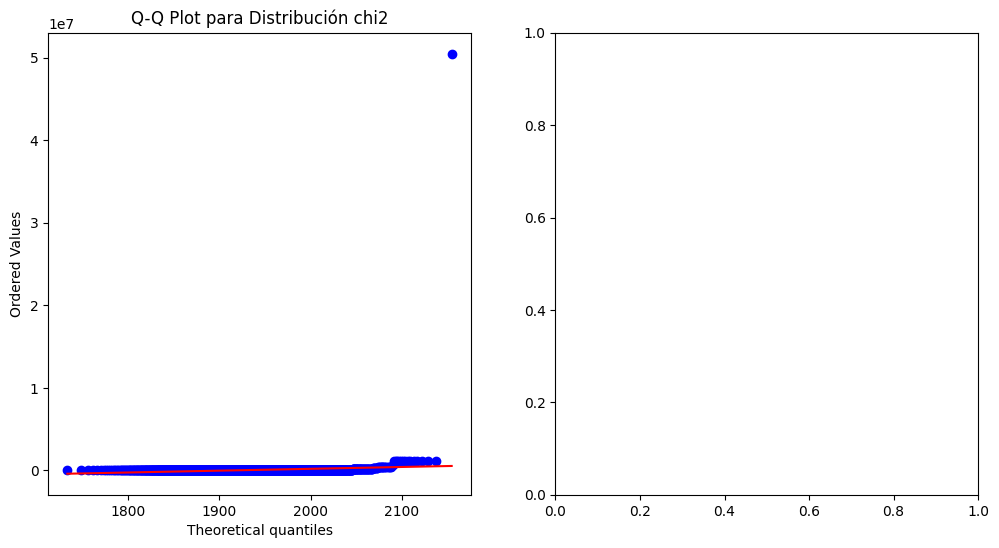

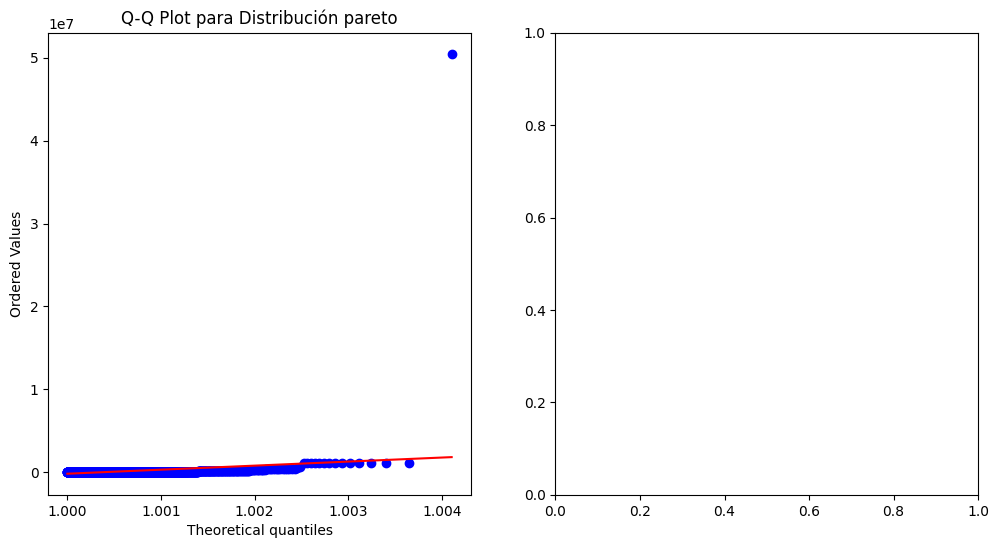

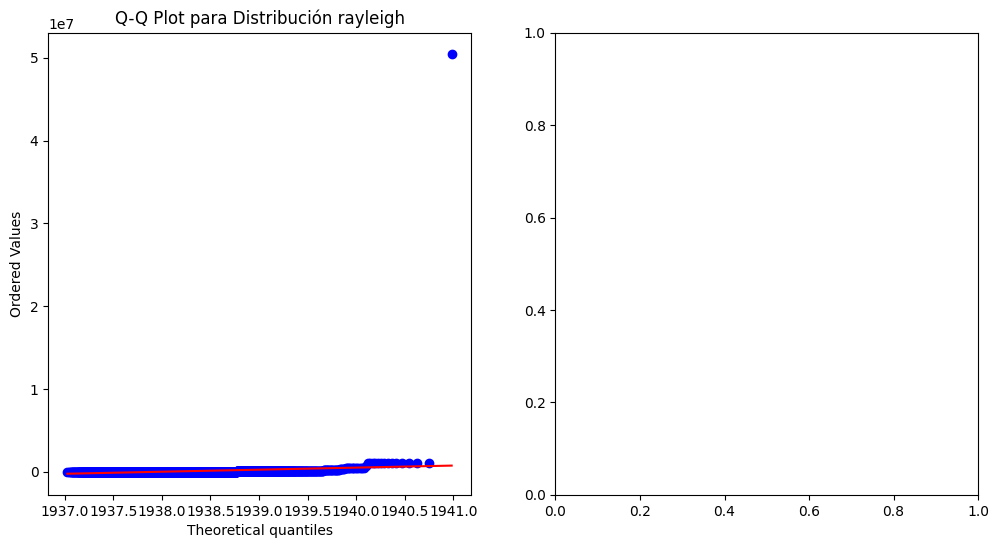

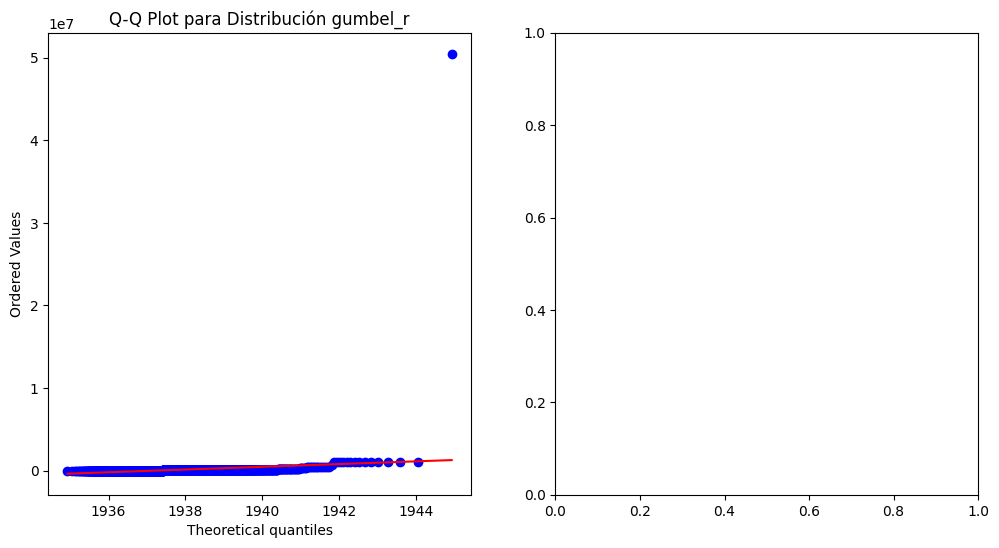

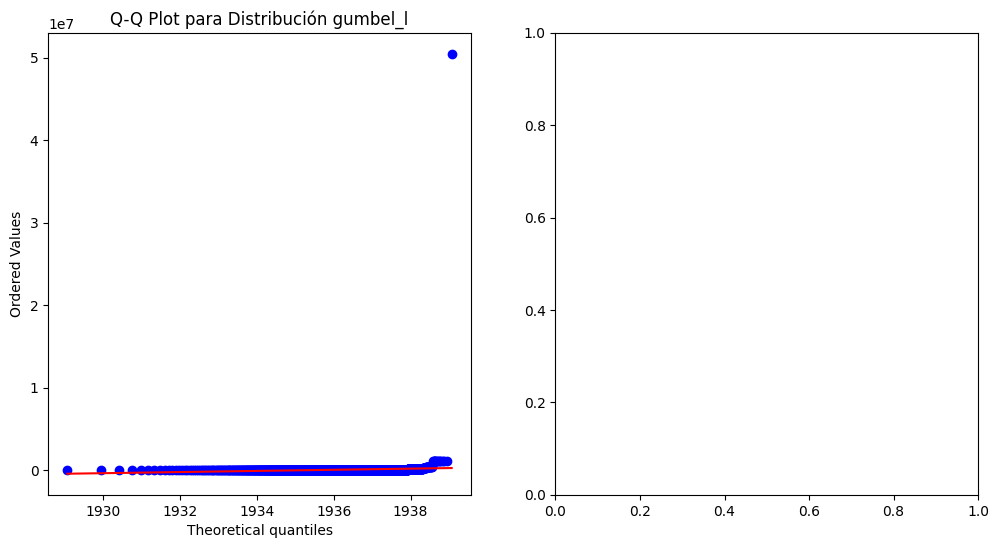

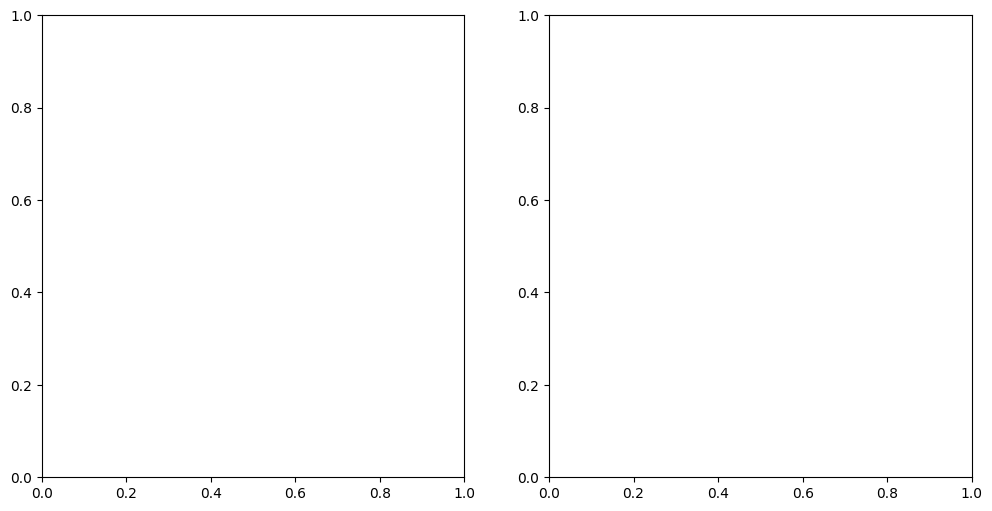

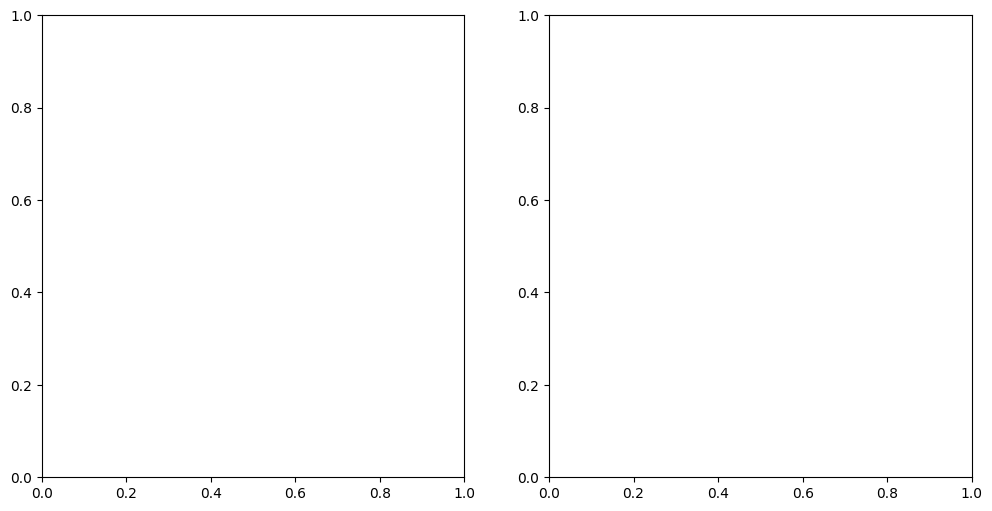

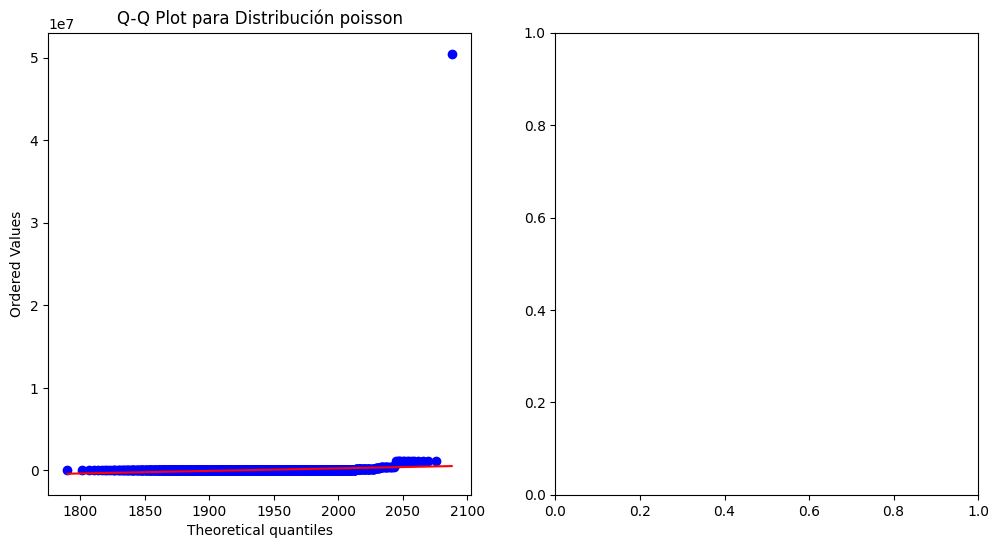

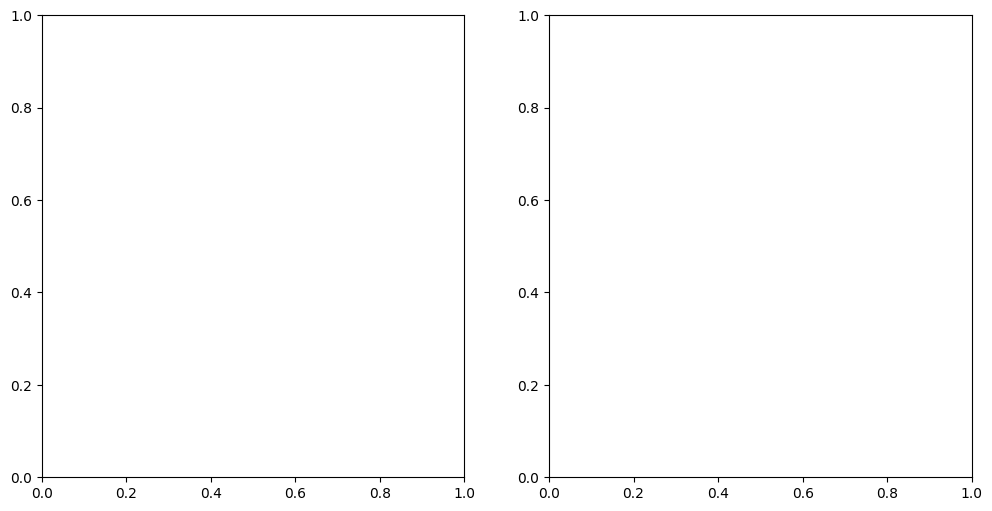

In [50]:
distribuciones = [
    'norm',          # Distribución Normal
    't',             # Distribución t de Student
    'expon',         # Distribución Exponencial
    'uniform',       # Distribución Uniforme
    'lognorm',       # Distribución Log-Normal
    'weibull_min',   # Distribución Weibull mínima
    'weibull_max',   # Distribución Weibull máxima
    'beta',          # Distribución Beta
    'gamma',         # Distribución Gamma
    'chi2',          # Distribución Chi-Cuadrado
    'pareto',        # Distribución Pareto
    'rayleigh',      # Distribución Rayleigh
    'gumbel_r',      # Distribución Gumbel derecha
    'gumbel_l',      # Distribución Gumbel izquierda
    'f',             # Distribución F de Fisher
    'binom',         # Distribución Binomial
    'poisson',       # Distribución Poisson
    'nbinom'         # Distribución Binomial Negativa
]

for distribucion in distribuciones:
    try:
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        stats.probplot(df['INGRESOS'], dist=distribucion, sparams=(len(df)-1,), plot=ax[0])
        ax[0].set_title(f'Q-Q Plot para Distribución {distribucion}')

        plt.show()
    except:
        pass

In [51]:
# limpiar de duplicados
df = df.drop_duplicates(subset=["DESEMBOLSO", "FECHA_CONCESION", "FECHA_VENCE", "DPI", "PLAZO", "TASA"])

In [52]:
df.sort_values(by="INGRESOS")["INGRESOS"]

2946         750.00
4215         860.00
2067         860.00
5208        1000.00
1460        1250.00
           ...     
2253     1096666.67
3501     1096666.67
3505     1096666.67
1912     1096666.67
572     50502028.00
Name: INGRESOS, Length: 1913, dtype: float64

In [78]:
# quitar los que tienen nulos
df.dropna(how="any", inplace=True)
df["TIPO_CLIENTE"] = "EXISTENTE"

In [81]:
# Sacar resumen de tasa por salario y riesgo
combinaciones = [("INGRESOS", "NIVEL RIESGO"), ("RCI_INTERNO", "NIVEL RIESGO"),("PLAZO", "NIVEL RIESGO")]

df_temp = df[~df["nombre_patrono"].isin(["Ministerio de Educacion", "Organismo Judicial"])]
for (col1, col2) in combinaciones:
    if col1 == "NIVEL RIESGO" or col2 == "NIVEL RIESGO":
        try:
            resultado_percentiles(df_temp[(df_temp["INGRESOS"] >= 3000) & (df_temp["INGRESOS"] <= 150000)], "BANCO INDUSTRIAL, S. A.", 4, ["EXISTENTE"],
                                f"No patronos {col1} y {col2}",
                                col2, col1, "TIPO_CLIENTE", 
                                "ENTIDAD", "TASA", "DESEMBOLSO")
        except Exception as e:
            print(e)
            print((col1, col2))
    if col1 != "NIVEL RIESGO" and col2 != "NIVEL RIESGO":
        try:
            resultado_percentiles(df_temp[(df_temp["INGRESOS"] >= 3000) & (df_temp["INGRESOS"] <= 150000)], "BANCO INDUSTRIAL, S. A.", 4, ["EXISTENTE"],
                                f"No patronos {col1} y {col2}",
                                col1, col2, "TIPO_CLIENTE", 
                                "ENTIDAD", "TASA", "DESEMBOLSO")
        except Exception as e:
            print(e)
            print((col1, col2))

## Sacar salarios promedios

In [57]:
df_salarios = df.drop_duplicates(subset=["DPI"])

In [107]:
combinaciones = [("INGRESOS", "NIVEL RIESGO"), ("RCI_INTERNO", "NIVEL RIESGO")]
montos_elegidos = [[3000, 7000, 15000, 25000,45000, 150000], [1, 20, 35, 45, 55]]
df_temp = df[df["nombre_patrono"].isin(["Ministerio de Educacion", "Organismo Judicial"])]
for i in range(2):
    try:
        resultado_por_montos(df_temp, "BANCO INDUSTRIAL, S. A.", ["EXISTENTE"], 
                            montos_elegidos[i], f"No Salarios patronos {combinaciones[i][0]} y {combinaciones[i][1]}",
                            combinaciones[i][1], combinaciones[i][0], "TIPO_CLIENTE", "ENTIDAD",
                            "TASA", 5, "INGRESOS")
    except Exception as e:
        print(e)

In [100]:
resultado_por_montos(df_temp, "BANCO INDUSTRIAL, S. A.", ["EXISTENTE"],
                     montos_elegidos[1], "fjfj", "NIVEL RIESGO", "RCI_INTERNO",
                     "TIPO_CLIENTE", "ENTIDAD", "TASA", 5, "INGRESOS")

In [108]:
resultado_percentiles(df_temp, "BANCO INDUSTRIAL, S. A.", 4, ["EXISTENTE"],
                                f"PATRONOS RCI",
                                "NIVEL RIESGO", "RCI_INTERNO", "TIPO_CLIENTE", 
                                "ENTIDAD", "TASA", "INGRESOS")